In [ ]:
# 0.3 
# TODO:
#     categorize function + handle misc     /more or less DONE
#     basic summarizations and stats test   /DONE
#     improve input - graphic interface?    /0.4
#     basic graph test                      /DONE

# in 0.4 package into functions, graphs and user interface
# in 0.5 verzovani
# in 0.6 upload to heroku

# in 0.9 .... reading from web/other apps, learning

In [1]:
import pandas as pd
import re
import time
import pickle

In [ ]:
#just a basic sum function for the table - throw out?
def findsum(word = '', df = fin,col = 'desc', figcol = 'figure'):
    total = df.loc[df[col].str.contains(word, flags=re.I, regex=True, na = False)][figcol].sum()
    return total

In [31]:
#reads excel file

fin = pd.read_excel('skandia_2020-01-01_2020-01-01.xlsx')

In [32]:
#cleans input
def clean(df):
    '''accepts pandas.DataFrame (from Skandia!!!) as argument and cleans it'''
    fin.columns = fin.iloc[2]
    fin = fin.drop([0,1,2])
    fin = fin.reset_index()
    fin = fin.drop(columns = 'index')

    fin.columns = ['date', 'desc', 'figure', 'balance']
    fin.loc[fin['desc'].str.contains('^2020|^2019', 
                                     flags = re.I, 
                                     regex = True, 
                                     na = False), 
            'desc'] = fin['desc'].str.slice(start = 10)
    
    return fin

In [2]:
fin = pd.read_csv('findata.csv')
fin

,date,month,desc,figure,balance,category
0,2020-05-04,5,"NETONNET AB, VÄXJÖ",-539.00,25556.73,NaN
1,2020-05-04,5,"NETONNET AB, VÄXJÖ",-200.00,26095.73,NaN
2,2020-04-30,4,"VAXJO OAS CAFE, VAXJO",-98.00,26295.73,NaN
3,2020-04-30,4,"PRESSBYRÅN 4025376, VÄXJÖ",-70.00,26393.73,NaN
4,2020-04-30,4,"kontaktlös LIDL 131/VEXJO OSTERLEDEN, VEXJO",-41.70,26463.73,NaN
...,...,...,...,...,...,...
225,2020-01-02,1,"WILLYS VÄXJÖ I11, VÄXJÖ",-1200.41,25103.27,NaN
226,2020-01-02,1,"SYSTEMBOLAGET VÄXJÖ, VÄXJÖ",-393.00,26303.68,NaN
227,2020-01-02,1,"WILLYS VÄXJÖ I11, VÄXJÖ",-23.80,26696.68,NaN
228,2020-01-02,1,"JULA AB, VÄXJÖ",-199.00,26720.48,NaN


In [132]:
# saving the dict
#TODO: saving to JSON/CSV/TXT

with open('fincat.dict', 'wb') as fincat_file:
    pickle.dump(fincat, fincat_file)

In [32]:
# loading the dict

with open('fincat.dict', 'rb') as fincat_file:
    fincat = pickle.load(fincat_file)
    print(fincat)

{'literature': [], 'revolut': ['REVOLUT'], 'charity': [], 'utilities': [], 'alcohol': ['SYSTEMBOLAGET'], 'holidays': [], 'gifts': [], 'furniture': [], 'tools': [], 'electro': [], 'phone': [], 'rent': [], 'car': [], 'food': ['WILLYS', 'LIDL', 'PRESSBYRÅN', 'MAX'], 'transportation': [], 'trips_home': [], 'clothes': [], 'freetime': [], 'exercise': [], 'health': [], 'savings': [], 'misc': []}


In [88]:
#TODO / error handling - df must be dataframe, d must be dict, etc


def categorize(df = fin, d = fincat):
    '''Accepts 2 arguments (df = DataFrame and d = dictionary) and returns dataframe with new column called category where the
    row are categorized according to the column 'desc' and key in the provided dictinary
    
    df = fin    must be pandas.DataFrame and have column 'desc'
    
    d = fincat  must be a dictionery and contain categories as keys and keywords for categories as values
    
    if function does not find a keyword corresponding to a description in df['desc'] it will suggests 
    creating a new keyword and asks for a category'''
    
    if not 'category' in df.columns:
        df['category'] = 'NaN'
        
    matches = 0
    key_in = '##############################'
    total_len = sum(len(v) for v in iter(d.values()))

    for i, row in df.iterrows():
        match = False
        key_iter = 0

        for category, keylist in d.items():
            if match == True:
                match = False
                break

            for key in keylist:
                key_iter += 1

                if str(row['desc']).find(key) != -1:
                    matches += 1
                    df.loc[i,'category'] = category
                    print('MATCH!!!')
                    match = True
                    break

                elif (key_iter >= total_len) & (key_in == ''):
                    break

                elif key_iter >= total_len:
                    print(row['desc'])
                    print(d.keys())
                    key_in = input('Input new keyword:')
                    category_in = input('Specify category:')
                    if key_in == '':
                        break
                    elif category_in in d.keys() == False:
                        # not found only once - replace with while loop (while not False repeat input)
                        print('Category not found!')
                    else:
                        d[category_in].append(key_in)
                        df.loc[i,'category'] = category_in
                        print('MATCH!!!')
                        match = True
                        
    return [df, d, matches]

In [75]:
fin = fin.drop(columns = 'category')

In [87]:
'category' in fin.columns

False

In [100]:
??pandas.DataFrame.loc

Object `pandas.DataFrame.loc` not found.


In [48]:
matches = 0
match = False
key_in = '##############################'

total_len = sum(len(v) for v in iter(fincat.values()))

for i, row in fin.iterrows():
    match = False
    key_iter = 0
    print('\n \n New search:' + str(row['desc']))
    
    for category, keylist in fincat.items():
        if match == True:
            match = False
            break
        
        print(category)
        for key in keylist:
            key_iter += 1
            print('\t' + key + ', index: ' + str(key_iter))
            
            if str(row['desc']).find(key) != -1:
                match += 1
                fin.loc[i,'category'] = category
                print('MATCH!!!')
                match = True
                break

            elif (key_iter >= total_len) & (key_in == ''):
                break

            elif key_iter >= total_len:
                print(row['desc'])
                print(fincat.keys())
                key_in = input('Input new keyword:')
                category_in = input('Specify category:')
                if key_in == '':
                    break
                elif category_in in fincat.keys() == False:
                    # not found only once - replace with while loop (while not False repeat input)
                    print('Category not found!')
                else:
                    fincat[category_in].append(key_in)
                    fin.loc[i,'category'] = category_in
                    print('MATCH!!!')
                    match = True

print('Matches: ' + str(match))
print(fin)
print(fincat)          


 
 New search: NETONNET AB, VÄXJÖ
literature
revolut
	REVOLUT, index: 1
charity
utilities
alcohol
	SYSTEMBOLAGET, index: 2
holidays
gifts
furniture
tools
electro
	NETONNET, index: 3
MATCH!!!
phone

 
 New search: NETONNET AB, VÄXJÖ
literature
revolut
	REVOLUT, index: 1
charity
utilities
alcohol
	SYSTEMBOLAGET, index: 2
holidays
gifts
furniture
tools
electro
	NETONNET, index: 3
MATCH!!!
phone

 
 New search: VAXJO OAS CAFE, VAXJO
literature
revolut
	REVOLUT, index: 1
charity
utilities
alcohol
	SYSTEMBOLAGET, index: 2
holidays
gifts
furniture
tools
electro
	NETONNET, index: 3
phone
rent
car
food
	WILLYS, index: 4
	LIDL, index: 5
	PRESSBYRÅN, index: 6
	MAX, index: 7
 VAXJO OAS CAFE, VAXJO
dict_keys(['literature', 'revolut', 'charity', 'utilities', 'alcohol', 'holidays', 'gifts', 'furniture', 'tools', 'electro', 'phone', 'rent', 'car', 'food', 'transportation', 'trips_home', 'clothes', 'freetime', 'exercise', 'health', 'savings', 'misc'])
Input new keyword:CAFE
Specify category:freetime
t

transportation

 
 New search:LÖN
literature
revolut
	REVOLUT, index: 1
charity
utilities
alcohol
	SYSTEMBOLAGET, index: 2
holidays
gifts
furniture
tools
electro
	NETONNET, index: 3
phone
rent
car
food
	WILLYS, index: 4
	LIDL, index: 5
	PRESSBYRÅN, index: 6
	MAX, index: 7
transportation
trips_home
clothes
freetime
	CAFE, index: 8
exercise
health
savings
misc

 
 New search: XXL SPORT & VIL, VÄXJÖ
literature
revolut
	REVOLUT, index: 1
charity
utilities
alcohol
	SYSTEMBOLAGET, index: 2
holidays
gifts
furniture
tools
electro
	NETONNET, index: 3
phone
rent
car
food
	WILLYS, index: 4
	LIDL, index: 5
	PRESSBYRÅN, index: 6
	MAX, index: 7
transportation
trips_home
clothes
freetime
	CAFE, index: 8
exercise
health
savings
misc

 
 New search: SYSTEMBOLAGET VÄXJÖ, VÄXJÖ
literature
revolut
	REVOLUT, index: 1
charity
utilities
alcohol
	SYSTEMBOLAGET, index: 2
MATCH!!!
holidays

 
 New search: CIRCLE K OSBY, OSBY
literature
revolut
	REVOLUT, index: 1
charity
utilities
alcohol
	SYSTEMBOLAGET, index: 

In [15]:
match = 0
key_in = '##############################'

for i, row in fin.iterrows():
    
    for category, keylist in fincat.items():
        print(category)
    
        for w, key in enumerate(keylist):
            print('\t' + key)

            if str(row['desc']).find(key) != -1:
                match += 1
                fin.loc[i,'category'] = category
                break

            elif (w >= len(keylist) - 1) & (key_in == ''):
                break

            elif w >= len(keylist) - 1:
                print(row['desc'])
                print(fincat.keys())
                key_in = input('Input new keyword:')
                category_in = input('Specify category:')
                if key_in == '':
                    break
                else:
                    fincat[category_in].append(key_in)

print('Matches: ' + str(match))
print(fin)
print(fincat)          

literature
	WILLYS
	LIDL
	PRESSBYRÅN
	MAX
 NETONNET AB, VÄXJÖ
dict_keys(['literature', 'revolut', 'charity', 'utilities', 'alcohol', 'holidays', 'gifts', 'furniture', 'tools', 'electro', 'phone', 'rent', 'car', 'food', 'transportation', 'trips_home', 'clothes', 'freetime', 'exercise', 'health', 'savings', 'misc'])
Input new keyword:NETONNET
Specify category:electro
revolut
	REVOLUT
 NETONNET AB, VÄXJÖ
dict_keys(['literature', 'revolut', 'charity', 'utilities', 'alcohol', 'holidays', 'gifts', 'furniture', 'tools', 'electro', 'phone', 'rent', 'car', 'food', 'transportation', 'trips_home', 'clothes', 'freetime', 'exercise', 'health', 'savings', 'misc'])
Input new keyword:
Specify category:
charity
utilities
alcohol
	SYSTEMBOLAGET
holidays
gifts
furniture
tools
electro
	NETONNET
phone
rent
car
food
transportation
trips_home
clothes
freetime
exercise
health
savings
misc
literature
	WILLYS
	LIDL
	PRESSBYRÅN
	MAX
revolut
	REVOLUT
charity
utilities
alcohol
	SYSTEMBOLAGET
holidays
gifts
furnitu

furniture
tools
electro
	NETONNET
	NETONNET
phone
rent
car
food
transportation
trips_home
clothes
freetime
exercise
health
savings
misc
literature
	WILLYS
	LIDL
	PRESSBYRÅN
	MAX
revolut
	REVOLUT
charity
utilities
alcohol
	SYSTEMBOLAGET
holidays
gifts
furniture
tools
electro
	NETONNET
	NETONNET
phone
rent
car
food
transportation
trips_home
clothes
freetime
exercise
health
savings
misc
literature
	WILLYS
	LIDL
	PRESSBYRÅN
	MAX
revolut
	REVOLUT
charity
utilities
alcohol
	SYSTEMBOLAGET
holidays
gifts
furniture
tools
electro
	NETONNET
	NETONNET
phone
rent
car
food
transportation
trips_home
clothes
freetime
exercise
health
savings
misc
literature
	WILLYS
	LIDL
	PRESSBYRÅN
	MAX
revolut
	REVOLUT
charity
utilities
alcohol
	SYSTEMBOLAGET
holidays
gifts
furniture
tools
electro
	NETONNET
	NETONNET
phone
rent
car
food
transportation
trips_home
clothes
freetime
exercise
health
savings
misc
literature
	WILLYS
	LIDL
	PRESSBYRÅN
	MAX
revolut
	REVOLUT
charity
utilities
alcohol
	SYSTEMBOLAGET
holidays
gi

           date  month                                          desc   figure  \
0    2020-05-04      5                            NETONNET AB, VÄXJÖ  -539.00   
1    2020-05-04      5                            NETONNET AB, VÄXJÖ  -200.00   
2    2020-04-30      4                         VAXJO OAS CAFE, VAXJO   -98.00   
3    2020-04-30      4                     PRESSBYRÅN 4025376, VÄXJÖ   -70.00   
4    2020-04-30      4   kontaktlös LIDL 131/VEXJO OSTERLEDEN, VEXJO   -41.70   
..          ...    ...                                           ...      ...   
225  2020-01-02      1                       WILLYS VÄXJÖ I11, VÄXJÖ -1200.41   
226  2020-01-02      1                    SYSTEMBOLAGET VÄXJÖ, VÄXJÖ  -393.00   
227  2020-01-02      1                       WILLYS VÄXJÖ I11, VÄXJÖ   -23.80   
228  2020-01-02      1                                JULA AB, VÄXJÖ  -199.00   
229  2020-01-02      1                   BILTEMA SWEDEN VEXJO, VEXJO  -474.60   

      balance    category  

In [11]:
# search and categorize function 
# can even handle adding keywords to the list

# TODO: add a prefill functionality to the input function - in matplotlib?
#      add a category input and ability to acces and add to dict - choose from a list interface
#      package into a function
#      remove .drop and instead make a new col with categories
#      ignore capitalization
#      replace str.find with re.search


words = ['WILLYS', 'LIDL', 'JULA', 'PRESSBYRÅN', 'NETONNET', 'SYSTEMBOLAGET', 'BILTEMA', 'MAX']
altfin = fin
match = 0
newkey = '#################'

for i, row in altfin.iterrows():
#    input('Waiting...Please press Enter')
#    print(row['desc'])
    
    for w, key in enumerate(words):
#        print(key)
#        print(str(row['desc']).find(key) != -1)
#        time.sleep(0.3)
            
        if str(row['desc']).find(key) != -1:
            match += 1
            altfin = altfin.drop(index = i)
            break
        
        elif (w >= len(words) - 1) & (newkey == ''):
            break
        
        elif w >= len(words) - 1:
#            print(row['desc'])
            newkey = input('Input new keyword:')
#            category = input('Define category:')
            if newkey == '':
                break
            else:
                words.append(newkey)
        
print ('Matches: ' + str(match))
print (altfin)
print (words)



 VAXJO OAS CAFE, VAXJO
Enter new keyword: 
Matches: 64
           date                               desc  figure  balance
2    2020-04-30              VAXJO OAS CAFE, VAXJO     -98  26295.7
5    2020-04-30             BURGER KING AVD, VÄXJÖ     -87  26505.4
6    2020-04-30              Autogiro CA ARABYBOST   -9012  26592.4
7    2020-04-30            Överföring 9159 8807910    -500  35604.4
8    2020-04-28       ICA SUPERMARKET DALBO, VAXJO -222.87  36104.4
..          ...                                ...     ...      ...
217  2020-01-03        BONAN OCH MUSTASCHEN, VAXJO     -78  22329.7
218  2020-01-03   Klarna * spelexperten.com, Gavle    -388  22407.7
219  2020-01-02                   ST1 VÄXJÖ, VÄXJÖ -242.54  22795.7
221  2020-01-02             XXL SPORT & VIL, VÄXJÖ   -1946  22819.4
224  2020-01-02      CONDECO STORGATAN VEXJ, VEXJO    -294  24809.3

[166 rows x 4 columns]
['WILLYS', 'LIDL', 'JULA', 'PRESSBYRÅN', 'NETONNET', 'SYSTEMBOLAGET', 'BILTEMA', 'MAX']


In [38]:
# creating the new cols for months and categories

# CREATE
fin['category'] = 'NaN'

# CREATE by split
fin['month'] = fin['date'].str.split('-', expand = True)[1]

# REARRANGE
cols = list(fin.columns)
fin = fin[[cols[0]] + [cols[-1]] + cols[1:-1]]

fin

,date,month,desc,figure,balance,category
0,2020-05-04,05,"NETONNET AB, VÄXJÖ",-539,25556.7,NaN
1,2020-05-04,05,"NETONNET AB, VÄXJÖ",-200,26095.7,NaN
2,2020-04-30,04,"VAXJO OAS CAFE, VAXJO",-98,26295.7,NaN
3,2020-04-30,04,"PRESSBYRÅN 4025376, VÄXJÖ",-70,26393.7,NaN
4,2020-04-30,04,"kontaktlös LIDL 131/VEXJO OSTERLEDEN, VEXJO",-41.7,26463.7,NaN
...,...,...,...,...,...,...
225,2020-01-02,01,"WILLYS VÄXJÖ I11, VÄXJÖ",-1200.41,25103.3,NaN
226,2020-01-02,01,"SYSTEMBOLAGET VÄXJÖ, VÄXJÖ",-393,26303.7,NaN
227,2020-01-02,01,"WILLYS VÄXJÖ I11, VÄXJÖ",-23.8,26696.7,NaN
228,2020-01-02,01,"JULA AB, VÄXJÖ",-199,26720.5,NaN


In [14]:
# EXPORT

# fin.to_csv(path_or_buf = ('findata_'+str(fin['date'].min())+'_'+str(fin['date'].max())+'.csv'))
fin.to_csv('findata.csv', index = False)

{'literature': [],
 'revolut': ['REVOLUT'],
 'charity': [],
 'utilities': [],
 'alcohol': ['SYSTEMBOLAGET'],
 'holidays': [],
 'gifts': [],
 'furniture': [],
 'tools': [],
 'electro': ['NETONNET'],
 'phone': [],
 'rent': [],
 'car': [],
 'food': ['WILLYS', 'LIDL', 'PRESSBYRÅN', 'MAX'],
 'transportation': [],
 'trips_home': [],
 'clothes': [],
 'freetime': ['CAFE'],
 'exercise': [],
 'health': [],
 'savings': [],
 'misc': [],
 'salary': ['LÖN']}

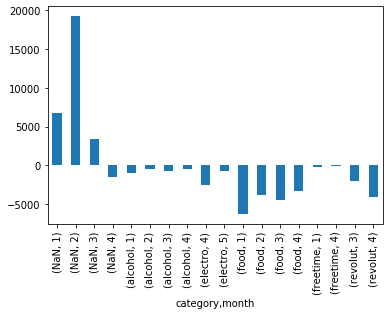

In [129]:
fin.groupby(['category','month'])['figure'].sum().plot.bar()